In [ ]:
# Here since i made 3 sentences, we focuse of the 3rd, show that it is longer, then other sentences and the target, we show variance between the 3 sentences and that they quand meme have commmon words 

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def generate_wordcloud(row):
    # Read the dataset
    df = pd.read_excel('datasets/dataset2.xlsx')
    df.dropna(inplace=True)
    
    # Get the text from the specified row
    text = ' '.join(df.loc[row, ['sentence 1', 'sentence 2', 'sentence 3']].values)
    
    # Generate the wordcloud
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          min_font_size=10).generate(text)
    
    # Plot the wordcloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    # Save the plot
    plt.savefig(f'plots/plot2/wordcloud_{row}.png')

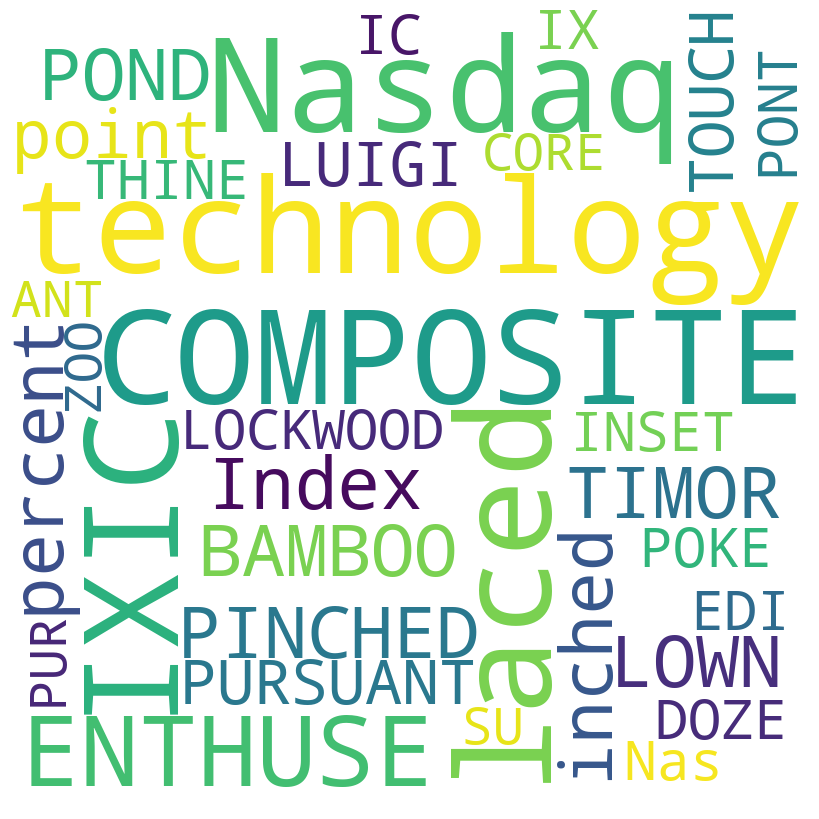

In [7]:
generate_wordcloud(1000)

In [33]:
df = pd.read_excel('datasets/dataset2.xlsx')
df.dropna(inplace=True)

In [34]:
# Plot the distribution of sentence lengths
df['sentence3_length'] = df['sentence 3'].str.len()
df['sentence2_length'] = df['sentence 2'].str.len()
df['target_length'] = df['Target'].str.len()

In [35]:
import seaborn as sns

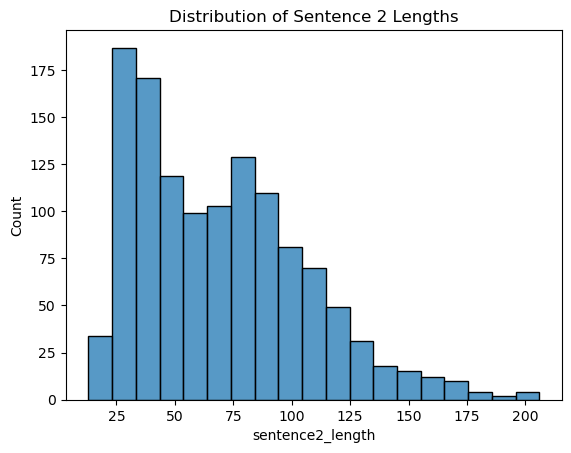

In [36]:
sns.histplot(data=df, x='sentence2_length')
plt.title('Distribution of Sentence 2 Lengths')
plt.savefig('plots/plot2/sentence2_length_distribution.png')

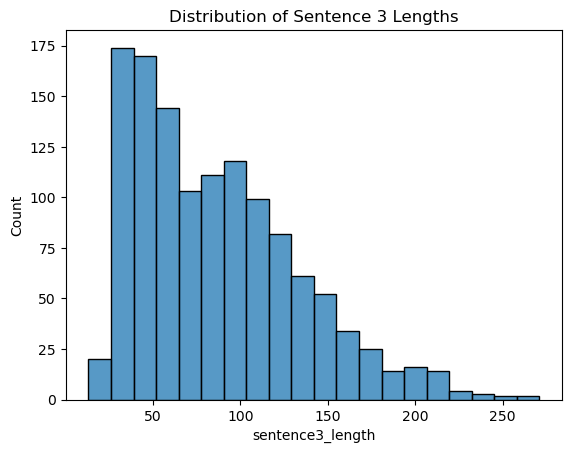

In [37]:
sns.histplot(data=df, x='sentence3_length')
plt.title('Distribution of Sentence 3 Lengths')
plt.savefig('plots/plot2/sentence3_length_distribution.png')

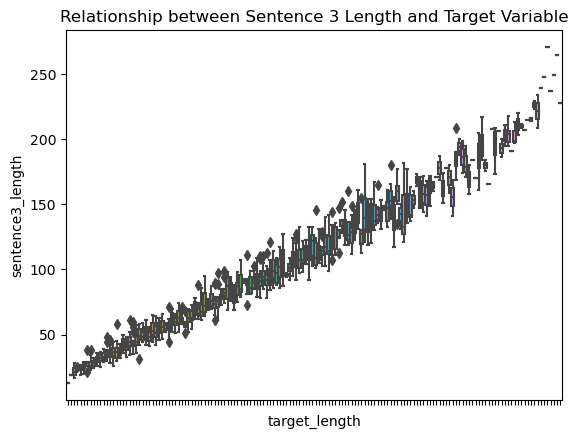

In [38]:
ax = sns.boxplot(x='target_length', y='sentence3_length', data=df)
ax.set_xticklabels([])
plt.title('Relationship between Sentence 3 Length and Target Variable')
plt.savefig('plots/plot2/sentence3_length_target_relationship.png')


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def get_word_counts(col1, col2, col3):
    # Read the dataset
    df = pd.read_excel('datasets/dataset2.xlsx')
    df.dropna(inplace=True)
    
    # Split the sentences into words and convert to lowercase
    words1 = df[col1].str.lower().str.split()
    words2 = df[col2].str.lower().str.split()
    words3 = df[col3].str.lower().str.split()

    # Flatten the lists of words and count the occurrences of each word
    word_counts1 = Counter(word for words in words1 for word in words)
    word_counts2 = Counter(word for words in words2 for word in words)
    word_counts3 = Counter(word for words in words3 for word in words)

    # Get the common and uncommon words and their counts
    common_words1 = word_counts1 - (word_counts2 | word_counts3)
    common_words2 = word_counts2 - (word_counts1 | word_counts3)
    common_words3 = word_counts3 - (word_counts1 | word_counts2)
    
    uncommon_words1 = (word_counts2 | word_counts3) - common_words1
    uncommon_words2 = (word_counts1 | word_counts3) - common_words2
    uncommon_words3 = (word_counts1 | word_counts2) - common_words3

    # Sum up the counts of common and uncommon words
    common_word_count1 = sum(common_words1.values())
    uncommon_word_count1 = sum(uncommon_words1.values())
    
    common_word_count2 = sum(common_words2.values())
    uncommon_word_count2 = sum(uncommon_words2.values())
    
    common_word_count3 = sum(common_words3.values())
    uncommon_word_count3 = sum(uncommon_words3.values())

    # Plot the bar chart
    bar_width = 0.35
    index = [0, 1, 2]
    
    plt.bar(index, [common_word_count1, common_word_count2, common_word_count3], bar_width, label='Uncommon Words')
    plt.bar([i + bar_width for i in index], [uncommon_word_count1, uncommon_word_count2, uncommon_word_count3], bar_width, label='Common Words')
    
    plt.xticks([i + bar_width/2 for i in index], [col1, col2, col3])
    
    plt.legend()
    
    plt.title(f'Common and Uncommon Words in {col1}, {col2}, and {col3}')
    
    plt.savefig('plots/plot2/Common_Uncommon_between_sentences.png')
    
    plt.show()

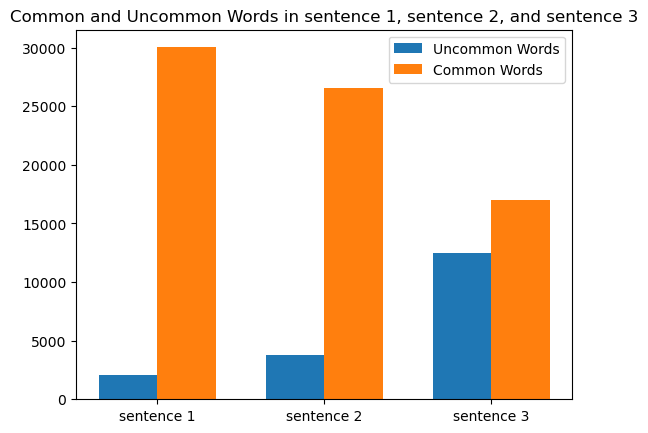

In [10]:
get_word_counts('sentence 1', 'sentence 2', 'sentence 3')